# Clustring_Assignment-7_Hierarchical (Crimes)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [3]:
df=pd.read_csv('C:/Users/Akash Kundu/Desktop/ExcelR/Assingments/crime_data.csv')
df.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df1=df.drop(['Unnamed: 0'],axis=1)
df1.head(4)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5


In [7]:
# Normalize heterogenous numerical data 
df1_norm=pd.DataFrame(normalize(df1),columns=df1.columns)
df1_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


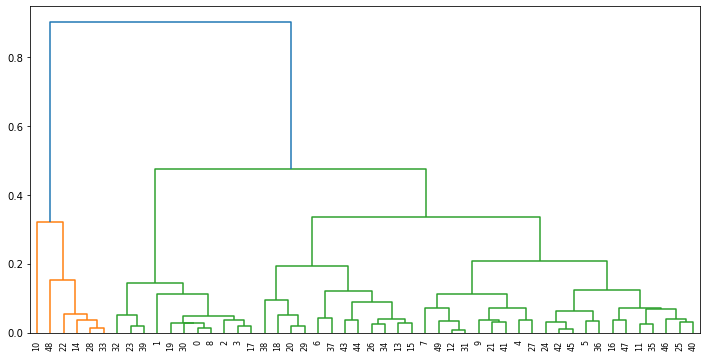

In [8]:
# Create Dendrograms
plt.figure(figsize=(12,6))
dendogram=sch.dendrogram(sch.linkage(df1_norm,'complete'))


In [15]:
# Create Clusters (y)
hcluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hcluster

AgglomerativeClustering(n_clusters=3)

In [18]:
y=pd.DataFrame(hcluster.fit_predict(df1_norm),columns=['clusterid'])
y['clusterid'].value_counts()

0    24
2    20
1     6
Name: clusterid, dtype: int64

In [19]:
# Adding clusters to dataset
df1['clusterid']=hcluster.labels_
df1

,Murder,Assault,UrbanPop,Rape,clusterid
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,2


In [20]:
df1.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.770833,129.083333,65.958333,18.575000
1,1,2.616667,54.833333,62.000000,12.333333
2,2,11.760000,255.550000,66.100000,27.090000


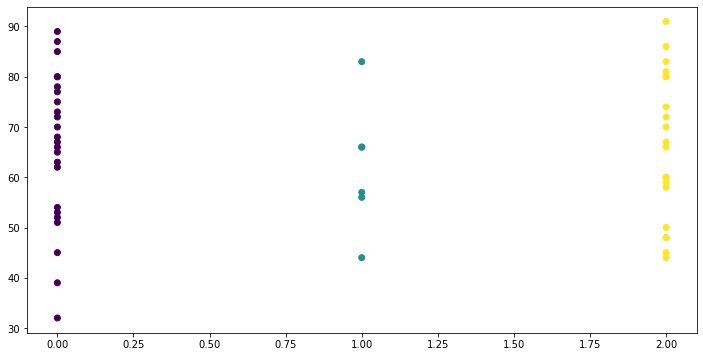

In [22]:
# Plot Clusters
plt.figure(figsize=(12,6))
plt.scatter(df1['clusterid'],df1['UrbanPop'],c=hcluster.labels_)
plt.show()